**optoSTING results - Figure 1 - RNA-seq**

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from plotstyle import defaultStyle, save_fig
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import mygene
from matplotlib.gridspec import GridSpec
from ast import literal_eval
import mygene

defaultStyle()
%matplotlib inline

# RNA-Seq

## Map Ensemble ID to gene names

In [2]:
rna_seq_path = "../data/RNAseq"
counts_per_mil_file = os.path.join(rna_seq_path, "mycount_cpm.csv")
seq_count_df = pd.read_csv(counts_per_mil_file)
col_names = seq_count_df.columns.tolist()
col_names[0] = "ensembl_id"
seq_count_df.columns = col_names
seq_count_df.head(10)

,ensembl_id,X0.NC,X3.NC,X3.PC,X8.NC,X8.PC,X235.PC
0,ENSG00000000003,188.140110,164.400966,150.327664,195.293186,210.862133,162.850146
1,ENSG00000000005,0.599172,0.278241,0.404832,0.507695,0.261561,0.446879
2,ENSG00000000419,56.286953,43.008183,40.314533,52.264338,52.443073,44.092059
3,ENSG00000000457,16.741580,20.033387,13.764292,19.348805,19.442735,18.284798
4,ENSG00000000460,35.139695,33.428726,28.675609,36.271958,35.790327,38.506072
5,ENSG00000000938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,ENSG00000000971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,ENSG00000001036,117.296794,98.894972,106.707002,105.910733,140.458506,110.639786
8,ENSG00000001084,39.721601,42.372203,37.615652,39.966846,45.337320,43.496220
9,ENSG00000001167,70.420371,60.775889,63.997213,72.684942,62.077254,64.722972


In [3]:
mg = mygene.MyGeneInfo()
gene_names = mg.querymany(seq_count_df.ensembl_id.tolist(), scopes='ensembl.gene', fields='symbol', species='human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [4]:
gene_symbols = [gene['symbol'] for gene in gene_names if 'symbol' in list(gene.keys())]
gene_query = [gene['query'] for gene in gene_names if 'symbol' in list(gene.keys())]
id2symb_map = {geneid:symb for symb, geneid in zip(gene_symbols, gene_query)}
seq_count_df["gene"] = seq_count_df.ensembl_id.map(id2symb_map)
seq_count_df.to_csv(os.path.join(rna_seq_path, "cpm_gene_names.csv"), index=False)

## Heatmap

Saving figure RNA-seq_heatmap


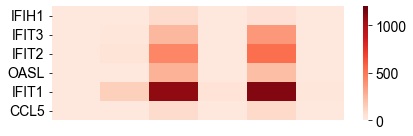

In [5]:
seq_count_df = pd.read_csv(os.path.join(rna_seq_path, "cpm_gene_names.csv"))
selected_cpm_df = seq_count_df[seq_count_df.gene.isin(['OASL', 'IFIH1', 'IFIT1', 'IFIT2', 'CCL5', 'IFIT3'])].copy()
selected_cpm_df.set_index("gene", inplace=True)
selected_cpm_df.drop(columns=["ensembl_id"], inplace=True)

_, ax = plt.subplots(1, 1, figsize=(6, 2))
sns.heatmap(selected_cpm_df, vmin=0, vmax=1200, center=550, alpha=1, ax=ax, cmap="Reds")
ax.set_yticklabels(selected_cpm_df.index.tolist(), rotation=0)
ax.set_ylabel('')
ax.set_xticklabels([])
ax.xaxis.set_visible(False)
save_fig("RNA-seq_heatmap")